In [4]:
import control
import numpy as np
import matplotlib.pyplot as plt

import kontrol


rel_sc_low_low = kontrol.load_transfer_function("noise_models/rel_sc_low_low.pkl")
rel_sc_low_mid = kontrol.load_transfer_function("noise_models/rel_sc_low_mid.pkl")
rel_sc_low_high = kontrol.load_transfer_function("noise_models/rel_sc_low_high.pkl")

rel_sc_mid_low = kontrol.load_transfer_function("noise_models/rel_sc_mid_low.pkl")
rel_sc_mid_mid = kontrol.load_transfer_function("noise_models/rel_sc_mid_mid.pkl")
rel_sc_mid_high = kontrol.load_transfer_function("noise_models/rel_sc_mid_high.pkl")

rel_sc_high_low = kontrol.load_transfer_function("noise_models/rel_sc_high_low.pkl")
rel_sc_high_mid = kontrol.load_transfer_function("noise_models/rel_sc_high_mid.pkl")
rel_sc_high_high = kontrol.load_transfer_function("noise_models/rel_sc_high_high.pkl")

gs13_low = kontrol.load_transfer_function("noise_models/gs13_low.pkl")
gs13_mid = kontrol.load_transfer_function("noise_models/gs13_mid.pkl")
gs13_high = kontrol.load_transfer_function("noise_models/gs13_high.pkl")

s = control.tf("s")
weight = (s+(2*np.pi*10))/(s+(2*np.pi*1)) / 10

gs13_low = gs13_low*weight
gs13_mid = gs13_mid*weight
gs13_high = gs13_high*weight


f = np.logspace(-3, 3, 1024)

h_sc = kontrol.load_transfer_function("../filters/CML_BB_SC.pkl")
h1 = kontrol.load_transfer_function("../filters/102mHzv2_disp.pkl")
h2 = kontrol.load_transfer_function("../filters/102mHzv2_inert.pkl")


s = control.tf("s")
weight = (s+(2*np.pi*10))/(s+(2*np.pi*1)) / 10

wn = 1*2*np.pi
q = 1/np.sqrt(2)
gs13_cal = (s**2 + wn/q*s + wn**2) / (s**3)
# Undo calibration coupling in the filter
h_sc = h_sc * s  # undo integrator
h2 = h2/gs13_cal  # undo gs13 calibration filter

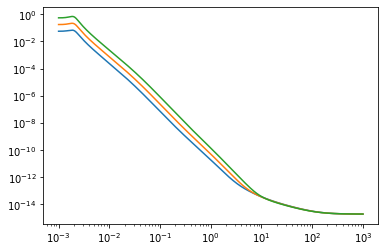

In [5]:
plt.loglog(f, abs(gs13_low(1j*2*np.pi*f)))
plt.loglog(f, abs(gs13_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(gs13_high(1j*2*np.pi*f)))

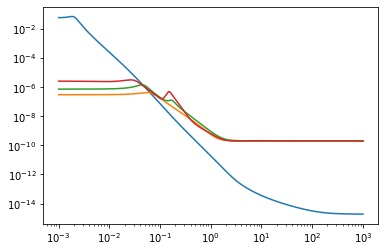

In [6]:
plt.loglog(f, abs(gs13_low(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_low_low(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_mid_low(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_high_low(1j*2*np.pi*f)))

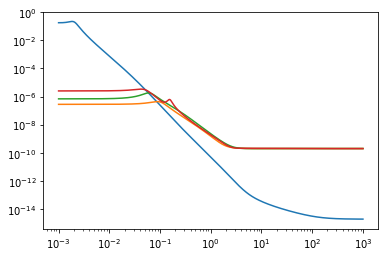

In [7]:
plt.loglog(f, abs(gs13_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_low_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_mid_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_high_mid(1j*2*np.pi*f)))

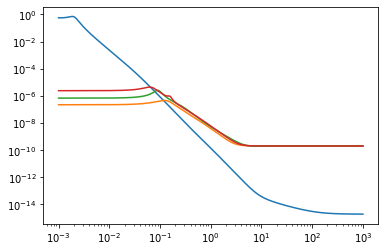

In [8]:
plt.loglog(f, abs(gs13_high(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_low_high(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_mid_high(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_high_high(1j*2*np.pi*f)))

In [9]:
comp_low_low = kontrol.ComplementaryFilter()
comp_low_low.noise1 = rel_sc_low_low
comp_low_low.noise2 = gs13_low
comp_low_low.weight1 = 1/gs13_low
comp_low_low.weight2 = 1/rel_sc_low_low
comp_low_low.h2synthesis()
h1_low_low, h2_low_low = comp_low_low.hinfsynthesis()

In [10]:

weight = (s+(2*np.pi*10))/(s+(2*np.pi*1)) / 10

In [11]:
comp_low_mid = kontrol.ComplementaryFilter()
comp_low_mid.noise1 = rel_sc_low_mid
comp_low_mid.noise2 = gs13_mid
comp_low_mid.weight1 = 1/gs13_mid
comp_low_mid.weight2 = 1/rel_sc_low_mid
comp_low_mid.h2synthesis()
h1_low_mid, h2_low_mid = comp_low_mid.hinfsynthesis()

In [12]:
comp_low_high = kontrol.ComplementaryFilter()
comp_low_high.noise1 = rel_sc_low_high
comp_low_high.noise2 = gs13_high
comp_low_high.weight1 = 1/gs13_high
comp_low_high.weight2 = 1/rel_sc_low_high
comp_low_high.h2synthesis()
h1_low_high, h2_low_high = comp_low_high.hinfsynthesis()

In [13]:
comp_mid_low = kontrol.ComplementaryFilter()
comp_mid_low.noise1 = rel_sc_mid_low
comp_mid_low.noise2 = gs13_low
comp_mid_low.weight1 = 1/gs13_low
comp_mid_low.weight2 = 1/rel_sc_mid_low
comp_mid_low.h2synthesis()
h1_mid_low, h2_mid_low = comp_mid_low.hinfsynthesis()

In [14]:
comp_mid_mid = kontrol.ComplementaryFilter()
comp_mid_mid.noise1 = rel_sc_mid_mid
comp_mid_mid.noise2 = gs13_mid
comp_mid_mid.weight1 = 1/gs13_mid
comp_mid_mid.weight2 = 1/rel_sc_mid_mid
comp_mid_mid.h2synthesis()
h1_mid_mid, h2_mid_mid = comp_mid_mid.hinfsynthesis()

In [15]:
comp_mid_high = kontrol.ComplementaryFilter()
comp_mid_high.noise1 = rel_sc_mid_high
comp_mid_high.noise2 = gs13_high
comp_mid_high.weight1 = 1/gs13_high
comp_mid_high.weight2 = 1/rel_sc_mid_high
comp_mid_high.h2synthesis()
h1_mid_high, h2_mid_high = comp_mid_high.hinfsynthesis()

In [16]:
comp_high_low = kontrol.ComplementaryFilter()
comp_high_low.noise1 = rel_sc_high_low
comp_high_low.noise2 = gs13_low
comp_high_low.weight1 = 1/gs13_low
comp_high_low.weight2 = 1/rel_sc_high_low
comp_high_low.h2synthesis()
h1_high_low, h2_high_low = comp_high_low.hinfsynthesis()

In [17]:
comp_high_mid = kontrol.ComplementaryFilter()
comp_high_mid.noise1 = rel_sc_high_mid
comp_high_mid.noise2 = gs13_mid
comp_high_mid.weight1 = 1/gs13_mid
comp_high_mid.weight2 = 1/rel_sc_high_mid
comp_high_mid.h2synthesis()
h1_high_mid, h2_high_mid = comp_high_mid.hinfsynthesis()

In [18]:
comp_high_high = kontrol.ComplementaryFilter()
comp_high_high.noise1 = rel_sc_high_high
comp_high_high.noise2 = gs13_high
comp_high_high.weight1 = 1/gs13_high
comp_high_high.weight2 = 1/rel_sc_high_high
comp_high_high.h2synthesis()
h1_high_high, h2_high_high = comp_high_high.hinfsynthesis()

In [19]:
# Clean up, Kill all high f zeros and poles
h2_low_low = kontrol.TransferFunction(h2_low_low.num[0][0][0:-1], h2_low_low.den[0][0][0:-1])
# h2_low_low_ = h2_low_low_*s

In [20]:
h2_low_mid = kontrol.TransferFunction(h2_low_mid.num[0][0][1:], h2_low_mid.den[0][0][1:])

In [21]:
h2_mid_mid = kontrol.TransferFunction(h2_mid_mid.num[0][0][1:], h2_mid_mid.den[0][0][1:])

In [22]:
h2_high_low = kontrol.TransferFunction(h2_high_low.num[0][0][1:], h2_high_low.den[0][0][1:])

In [23]:
wc = 0.002*2*np.pi  # 0.002 Hz
order = 4
s = control.tf("s")
prefilter = (s/(s+wc))**order

h2_prefilt_low_low = h2_low_low*prefilter
h1_prefilt_low_low = 1 - h2_prefilt_low_low
h2_prefilt_low_low = kontrol.TransferFunction(h2_prefilt_low_low)
h1_prefilt_low_low = kontrol.TransferFunction(h1_prefilt_low_low)

# h2_prefilt_low_low_ = h2_low_low_*prefilter
# h1_prefilt_low_low_ = 1 - h2_prefilt_low_low_
# h2_prefilt_low_low_ = kontrol.TransferFunction(h2_prefilt_low_low_)
# h1_prefilt_low_low_ = kontrol.TransferFunction(h1_prefilt_low_low_)

h2_prefilt_low_mid = h2_low_mid*prefilter
h1_prefilt_low_mid = 1 - h2_prefilt_low_mid
h2_prefilt_low_mid = kontrol.TransferFunction(h2_prefilt_low_mid)
h1_prefilt_low_mid = kontrol.TransferFunction(h1_prefilt_low_mid)

h2_prefilt_low_high = h2_low_high*prefilter
h1_prefilt_low_high = 1 - h2_prefilt_low_high
h2_prefilt_low_high = kontrol.TransferFunction(h2_prefilt_low_high)
h1_prefilt_low_high = kontrol.TransferFunction(h1_prefilt_low_high)

h2_prefilt_mid_low = h2_mid_low*prefilter
h1_prefilt_mid_low = 1 - h2_prefilt_mid_low
h2_prefilt_mid_low = kontrol.TransferFunction(h2_prefilt_mid_low)
h1_prefilt_mid_low = kontrol.TransferFunction(h1_prefilt_mid_low)

h2_prefilt_mid_mid = h2_mid_mid*prefilter
h1_prefilt_mid_mid = 1 - h2_prefilt_mid_mid
h2_prefilt_mid_mid = kontrol.TransferFunction(h2_prefilt_mid_mid)
h1_prefilt_mid_mid = kontrol.TransferFunction(h1_prefilt_mid_mid)

h2_prefilt_mid_high = h2_mid_high*prefilter
h1_prefilt_mid_high = 1 - h2_prefilt_mid_high
h2_prefilt_mid_high = kontrol.TransferFunction(h2_prefilt_mid_high)
h1_prefilt_mid_high = kontrol.TransferFunction(h1_prefilt_mid_high)

h2_prefilt_high_low = h2_high_low*prefilter
h1_prefilt_high_low = 1 - h2_prefilt_high_low
h2_prefilt_high_low = kontrol.TransferFunction(h2_prefilt_high_low)
h1_prefilt_high_low = kontrol.TransferFunction(h1_prefilt_high_low)

h2_prefilt_high_mid = h2_high_mid*prefilter
h1_prefilt_high_mid = 1 - h2_prefilt_high_mid
h2_prefilt_high_mid = kontrol.TransferFunction(h2_prefilt_high_mid)
h1_prefilt_high_mid = kontrol.TransferFunction(h1_prefilt_high_mid)

h2_prefilt_high_high = h2_high_high*prefilter
h1_prefilt_high_high = 1 - h2_prefilt_high_high
h2_prefilt_high_high = kontrol.TransferFunction(h2_prefilt_high_high)
h1_prefilt_high_high = kontrol.TransferFunction(h1_prefilt_high_high)

Text(0.5, 0, 'Frequency (Hz)')

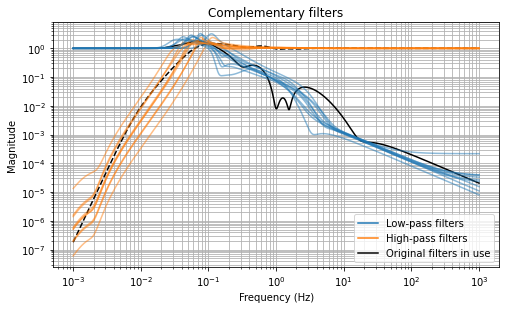

In [32]:
plt.figure(figsize=(8, 4.5))
plt.title("Complementary filters")


plt.loglog(f, abs(h1(1j*2*np.pi*f)), "k")
plt.loglog(f, abs(h2(1j*2*np.pi*f)), "k--")

plt.loglog(f, abs(h1_prefilt_low_low(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_low_low(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog(f, abs(h1_prefilt_low_mid(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_low_mid(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog(f, abs(h1_prefilt_low_high(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_low_high(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog(f, abs(h1_prefilt_mid_low(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_mid_low(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog(f, abs(h1_prefilt_mid_mid(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_mid_mid(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog(f, abs(h1_prefilt_mid_high(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_mid_high(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog(f, abs(h1_prefilt_high_low(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_high_low(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog(f, abs(h1_prefilt_high_mid(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_high_mid(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog(f, abs(h1_prefilt_high_high(1j*2*np.pi*f)), "C0", alpha=0.5)
plt.loglog(f, abs(h2_prefilt_high_high(1j*2*np.pi*f)), "C1", alpha=0.5)

plt.loglog([], [], "C0", label="Low-pass filters")
plt.loglog([], [], "C1", label="High-pass filters")
plt.loglog([], [], "k", label="Original filters in use")

plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Magnitude")
plt.xlabel("Frequency (Hz)")

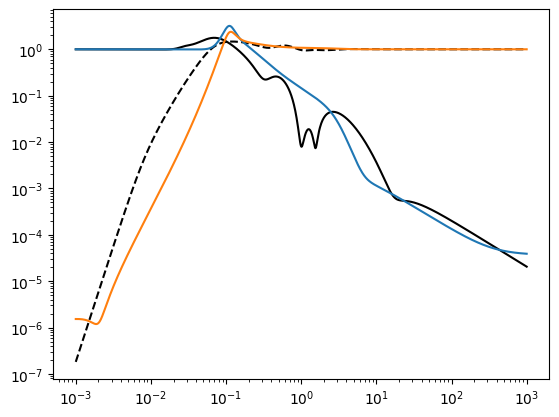

In [251]:
plt.loglog(f, abs(h1(1j*2*np.pi*f)), "k")
plt.loglog(f, abs(h2(1j*2*np.pi*f)), "k--")

# plt.loglog(f, abs(h1_prefilt_low_low(1j*2*np.pi*f)))
# plt.loglog(f, abs(h2_prefilt_low_low(1j*2*np.pi*f)))

# plt.loglog(f, abs(h1_prefilt_low_mid(1j*2*np.pi*f)))
# plt.loglog(f, abs(h2_prefilt_low_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_low_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_low_high(1j*2*np.pi*f)))

In [254]:
h2_low_high.poles()

array([-10.61065183+15.15058201j, -10.61065183-15.15058201j,
       -10.47478711+14.95415451j, -10.47478711-14.95415451j,
       -16.72010684 +0.23044417j, -16.72010684 -0.23044417j,
        -6.28924696 +0.j        ,  -6.27721386 +0.j        ,
        -0.13873546 +0.68535578j,  -0.13873546 -0.68535578j,
        -0.34108428 +0.62337605j,  -0.34108428 -0.62337605j,
        -0.65154144 +0.49988015j,  -0.65154144 -0.49988015j,
        -0.73384445 +0.06490191j,  -0.73384445 -0.06490191j,
        -0.63158134 +0.j        ])

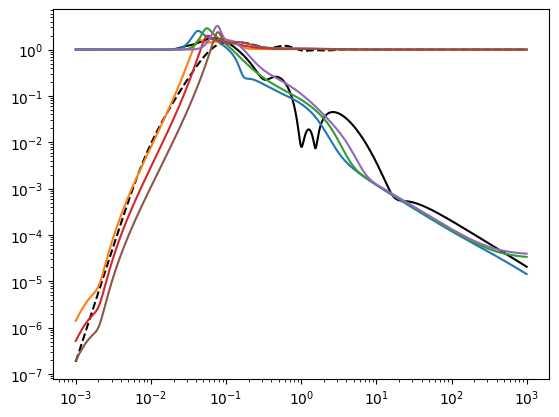

In [216]:
plt.loglog(f, abs(h1(1j*2*np.pi*f)), "k")
plt.loglog(f, abs(h2(1j*2*np.pi*f)), "k--")

plt.loglog(f, abs(h1_prefilt_mid_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_mid_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_mid_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_mid_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_mid_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_mid_high(1j*2*np.pi*f)))

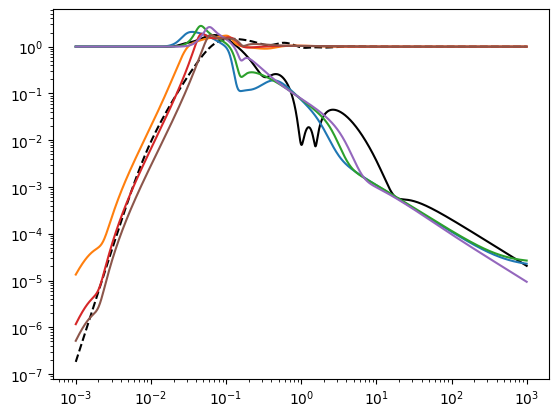

In [218]:
plt.loglog(f, abs(h1(1j*2*np.pi*f)), "k")
plt.loglog(f, abs(h2(1j*2*np.pi*f)), "k--")

plt.loglog(f, abs(h1_prefilt_high_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_high_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_high_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_high_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_high_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_high_high(1j*2*np.pi*f)))

In [219]:
h1_low_low.save("complementary_filters/h1_low_low.pkl")
h1_low_mid.save("complementary_filters/h1_low_mid.pkl")
h1_low_high.save("complementary_filters/h1_low_high.pkl")

h1_mid_low.save("complementary_filters/h1_mid_low.pkl")
h1_mid_mid.save("complementary_filters/h1_mid_mid.pkl")
h1_mid_high.save("complementary_filters/h1_mid_high.pkl")

h1_high_low.save("complementary_filters/h1_high_low.pkl")
h1_high_mid.save("complementary_filters/h1_high_mid.pkl")
h1_high_high.save("complementary_filters/h1_high_high.pkl")

In [220]:
h2_low_low.save("complementary_filters/h2_low_low.pkl")
h2_low_mid.save("complementary_filters/h2_low_mid.pkl")
h2_low_high.save("complementary_filters/h2_low_high.pkl")

h2_mid_low.save("complementary_filters/h2_mid_low.pkl")
h2_mid_mid.save("complementary_filters/h2_mid_mid.pkl")
h2_mid_high.save("complementary_filters/h2_mid_high.pkl")

h2_high_low.save("complementary_filters/h2_high_low.pkl")
h2_high_mid.save("complementary_filters/h2_high_mid.pkl")
h2_high_high.save("complementary_filters/h2_high_high.pkl")

In [221]:
prefilter = kontrol.TransferFunction(prefilter)
prefilter.save("complementary_filters/prefilter.pkl")

In [225]:
print(h1_prefilt_low_low.foton())

zpk([-0.011935+i*-0.000540;-0.011935+i*0.000540;-0.013192+i*-0.000763;-0.013192+i*0.000763;-0.109434+i*-0.223689;-0.109434+i*0.223689;-0.290597;-0.158768+i*-0.386183;-0.158768+i*0.386183;-1.72145;-2.86783;-6.2829;-4.186664+i*-7.205817;-4.186664+i*7.205817;-10.8325;0.040506+i*-13.138847;0.040506+i*13.138847;-12.869089+i*-6.139549;-12.869089+i*6.139549],[-0.012562;-0.012566+i*0.000004;-0.012566+i*-0.000004;-0.0125708;-0.086569+i*-0.356772;-0.086569+i*0.356772;-0.185202+i*-0.324340;-0.185202+i*0.324340;-0.392773+i*-0.290966;-0.392773+i*0.290966;-0.541336;-2.38266;-6.283188+i*-0.010741;-6.283188+i*0.010741;-4.182906+i*-7.204910;-4.182906+i*7.204910;-4.190407+i*-7.206993;-4.190407+i*7.206993;-10.832397+i*-0.002809;-10.832397+i*0.002809],0.0503421,"s")


In [249]:
h1_prefilt_low_low.zeros()

array([ 4.05059564e-02+1.31388475e+01j,  4.05059564e-02-1.31388475e+01j,
       -1.28690893e+01+6.13954893e+00j, -1.28690893e+01-6.13954893e+00j,
       -1.08324622e+01+0.00000000e+00j, -4.18666430e+00+7.20581669e+00j,
       -4.18666430e+00-7.20581669e+00j, -6.28290122e+00+0.00000000e+00j,
       -2.86782604e+00+0.00000000e+00j, -1.72145474e+00+0.00000000e+00j,
       -1.58768418e-01+3.86182602e-01j, -1.58768418e-01-3.86182602e-01j,
       -2.90597433e-01+0.00000000e+00j, -1.09434304e-01+2.23689414e-01j,
       -1.09434304e-01-2.23689414e-01j, -1.31921532e-02+7.62873613e-04j,
       -1.31921532e-02-7.62873613e-04j, -1.19351954e-02+5.40321605e-04j,
       -1.19351954e-02-5.40321605e-04j])

In [226]:
print(h1_prefilt_low_mid.foton())

12:54 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.013046+i*-0.000554;-0.013046+i*0.000554;-0.151940+i*-0.313013;-0.151940+i*0.313013;-0.379712;-0.213333+i*-0.593337;-0.213333+i*0.593337;-2.21195;-4.1985;-6.28304;-6.434127+i*10.204718;-6.434127+i*-10.204718;-16.6651;-13.029327+i*-25.329278;-13.029327+i*25.329278;-30.0083;-39.168926+i*-8.218523;-39.168926+i*8.218523;-2439.97],[-0.012566+i*-0.000003;-0.012566+i*0.000003;-0.0125691;-0.107117+i*-0.502025;-0.107117+i*0.502025;-0.270242+i*-0.462359;-0.270242+i*0.462359;-0.541710+i*-0.363641;-0.541710+i*0.363641;-0.701206;-6.283127+i*-0.004987;-6.283127+i*0.004987;-6.456724+i*-10.114651;-6.456724+i*10.114651;-6.404953+i*-10.294702;-6.404953+i*10.294702;-16.416351+i*-1.134188;-16.416351+i*1.134188;-38.445986+i*-6.833591;-38.445986+i*6.833591],3.16329e-05,"s")

zpk([-0.012085+i*0.000427;-0.012085+i*-0.000427],[-0.0125636],1,"s")


In [227]:
print(h1_prefilt_low_high.foton())

12:54 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.012923+i*-0.000395;-0.012923+i*0.000395;-0.179604+i*-0.435051;-0.179604+i*0.435051;-0.484439+i*-0.126370;-0.484439+i*0.126370;-0.658218;-0.293268+i*-0.795832;-0.293268+i*0.795832;-2.98547;-4.61922;-6.28302;-16.7268;-10.542828+i*-15.050165;-10.542828+i*15.050165;-38.9557;-16.637850+i*-38.686589;-16.637850+i*38.686589;-2189.06],[-0.012566+i*0.000004;-0.012566+i*-0.000004;-0.0125706;-0.631581;-0.138735+i*0.685356;-0.138735+i*-0.685356;-0.341084+i*0.623376;-0.341084+i*-0.623376;-0.733844+i*0.064902;-0.733844+i*-0.064902;-0.651541+i*0.499880;-0.651541+i*-0.499880;-6.27721;-6.28925;-16.720107+i*0.230444;-16.720107+i*-0.230444;-10.474787+i*-14.954155;-10.474787+i*14.954155;-10.610652+i*-15.150582;-10.610652+i*15.150582],3.69291e-05,"s")

zpk([-0.012210+i*0.000326;-0.012210+i*-0.000326],[-0.0125621],1,"s")


In [228]:
print(h1_prefilt_mid_low.foton())

12:54 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.266113;-0.079648+i*0.288593;-0.079648+i*-0.288593;-0.262752+i*-0.923921;-0.262752+i*0.923921;-0.168178+i*-1.043672;-0.168178+i*1.043672;-1.55951;-3.081876+i*-1.113886;-3.081876+i*1.113886;-5.337492+i*1.521946;-5.337492+i*-1.521946;-6.28427;-6.968078+i*-8.618160;-6.968078+i*8.618160;-11.325841+i*-15.843066;-11.325841+i*15.843066;-22.2791;-1221.9],[-0.119511+i*-0.263969;-0.119511+i*0.263969;-0.333671+i*-0.264346;-0.333671+i*0.264346;-0.467567;-0.255954+i*-0.920403;-0.255954+i*0.920403;-0.267889+i*-0.927994;-0.267889+i*0.927994;-5.311626+i*-1.522538;-5.311626+i*1.522538;-5.365509+i*1.521839;-5.365509+i*-1.521839;-6.23332;-6.33136;-6.965215+i*-8.617341;-6.965215+i*8.617341;-6.970852+i*-8.619021;-6.970852+i*8.619021;-1521.5],0.0906608,"s")

zpk([-0.011812+i*0.000628;-0.011812+i*-0.000628;-0.013310+i*0.000950;-0.013310+i*-0.000950;-0.082091+i*0.182469;-0.082091+i*-0.182469],[-0.012561;-0.012566+i*0.000005;-0.012566+i*-0.000005;-0.0125717;-0.050805+i*0.260338;-0.050805+i*-0.260338],1,

In [230]:
print(h1_prefilt_mid_mid.foton())

12:54 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.013160+i*-0.000714;-0.013160+i*0.000714;-0.093466+i*-0.238630;-0.093466+i*0.238630;-0.339617+i*-0.098353;-0.339617+i*0.098353;-0.107332+i*-0.376924;-0.107332+i*0.376924;-1.113468+i*-0.032287;-1.113468+i*0.032287;-2.68033;-6.28263;-8.71931;-10.048451+i*-13.200698;-10.048451+i*13.200698;-28.922;-13.873006+i*-25.523957;-13.873006+i*25.523957;-2454.46],[-0.012566+i*-0.000005;-0.012566+i*0.000005;-0.0125711;-0.062572+i*-0.341939;-0.062572+i*0.341939;-0.145712+i*-0.334238;-0.145712+i*0.334238;-0.324529+i*-0.342180;-0.324529+i*0.342180;-0.491008+i*-0.185517;-0.491008+i*0.185517;-0.534822;-6.262821+i*-0.132250;-6.262821+i*0.132250;-8.678846+i*-0.598703;-8.678846+i*0.598703;-9.765853+i*-12.419100;-9.765853+i*12.419100;-10.188625+i*-14.136016;-10.188625+i*14.136016],3.12879e-05,"s")

zpk([-0.011968+i*0.000517;-0.011968+i*-0.000517],[-0.0125616],1,"s")


In [231]:
print(h1_prefilt_mid_high.foton())

12:55 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.013043+i*-0.000549;-0.013043+i*0.000549;-0.135116+i*-0.330586;-0.135116+i*0.330586;-0.456722;-0.096738+i*-0.566978;-0.096738+i*0.566978;-0.908829;-1.042660+i*-1.376150;-1.042660+i*1.376150;-3.14575;-4.38595;-6.28339;-17.075890+i*-23.224300;-17.075890+i*23.224300;-36.117;-19.352047+i*-39.576779;-19.352047+i*39.576779;-2174.9],[-0.012568+i*-0.000002;-0.012568+i*0.000002;-0.068708+i*-0.484549;-0.068708+i*0.484549;-0.202636+i*-0.505887;-0.202636+i*0.505887;-0.504617+i*-0.531661;-0.504617+i*0.531661;-0.912150+i*-0.332597;-0.912150+i*0.332597;-1.13068;-4.37768;-4.39458;-6.26806;-6.29797;-17.197025+i*-22.898474;-17.197025+i*22.898474;-16.939732+i*-23.551799;-16.939732+i*23.551799],3.72444e-05,"s")

zpk([-0.012088+i*0.000425;-0.012088+i*-0.000425],[-0.012564+i*0.000002;-0.012564+i*-0.000002],1,"s")


In [232]:
print(h1_prefilt_high_low.foton())

12:55 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.248271;-0.136242+i*0.685890;-0.136242+i*-0.685890;-0.111598+i*-0.882386;-0.111598+i*0.882386;-0.640493+i*-1.195453;-0.640493+i*1.195453;-1.60368;-1.310950+i*-2.411997;-1.310950+i*2.411997;-6.28363;-6.399883+i*-9.507572;-6.399883+i*9.507572;-17.8067;-9.657188+i*-16.646077;-9.657188+i*16.646077;-92.203442+i*-15.208169;-92.203442+i*15.208169;-3377.24],[-0.269026+i*-0.245388;-0.269026+i*0.245388;-0.40625;-0.148756+i*-0.684926;-0.148756+i*0.684926;-0.123392+i*-0.693673;-0.123392+i*0.693673;-1.296983+i*-2.410313;-1.296983+i*2.410313;-1.326720+i*-2.412882;-1.326720+i*2.412882;-6.27522;-6.29095;-6.343026+i*-9.531361;-6.343026+i*9.531361;-6.456737+i*-9.481757;-6.456737+i*9.481757;-91.999315+i*-15.907803;-91.999315+i*15.907803],2.01459e-05,"s")

zpk([-0.0109754;-0.012308+i*0.001790;-0.012308+i*-0.001790;-0.0146806;-0.0345325;-0.063839+i*0.135447;-0.063839+i*-0.135447;-0.070426+i*0.181321;-0.070426+i*-0.181321],[-0.012561+i*0.000005;-0.012561+i*-0.000005;-0.012571+i*0.000005;-0.012571+i*-

In [233]:
print(h1_prefilt_high_mid.foton())

12:55 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.27715;-0.115197+i*0.299697;-0.115197+i*-0.299697;-0.565805;-0.221140+i*-0.776639;-0.221140+i*0.776639;-0.113961+i*-0.958207;-0.113961+i*0.958207;-2.36398;-2.90769;-6.28466;-7.280927+i*-13.770655;-7.280927+i*13.770655;-16.42;-11.140905+i*-24.368469;-11.140905+i*24.368469;-30.6462;-34.5281;-2926.84],[-0.144143+i*-0.280712;-0.144143+i*0.280712;-0.392417;-0.377397+i*0.191128;-0.377397+i*-0.191128;-0.240265+i*-0.775744;-0.240265+i*0.775744;-0.203324+i*-0.786926;-0.203324+i*0.786926;-2.89179;-2.92712;-6.25483;-6.31094;-7.229614+i*-13.740641;-7.229614+i*13.740641;-7.333550+i*-13.801262;-7.333550+i*13.801262;-30.503378+i*-0.738866;-30.503378+i*0.738866],2.42154e-05,"s")

zpk([-0.011832+i*0.000615;-0.011832+i*-0.000615;-0.013291+i*0.000916;-0.013291+i*-0.000916;-0.093044+i*0.202561;-0.093044+i*-0.202561],[-0.012564+i*0.000002;-0.012564+i*-0.000002;-0.012569+i*0.000002;-0.012569+i*-0.000002;-0.050850+i*0.279879;-0.050850+i*-0.279879],1,"s")


In [234]:
print(h1_prefilt_high_high.foton())

12:55 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.358582;-0.123804+i*0.410350;-0.123804+i*-0.410350;-0.101975+i*-0.986297;-0.101975+i*0.986297;-0.181136+i*-0.985258;-0.181136+i*0.985258;-2.70203;-4.19124;-6.28306;-15.9116;-13.419428+i*-18.116216;-13.419428+i*18.116216;-38.2103;-16.035449+i*-37.922201;-16.035449+i*37.922201;-358.579;-505.516;-506.184],[-0.176314+i*-0.363758;-0.176314+i*0.363758;-0.450082+i*-0.358791;-0.450082+i*0.358791;-0.643612;-0.179239+i*-0.977530;-0.179239+i*0.977530;-0.181149+i*-0.991852;-0.181149+i*0.991852;-6.27797;-6.28842;-15.9067;-15.9164;-13.417875+i*-18.115800;-13.417875+i*18.115800;-13.420957+i*-18.116653;-13.420957+i*18.116653;-304.973;-505.515960+i*-0.000034;-505.515960+i*0.000034],0.05898,"s")

zpk([-0.011957+i*0.000525;-0.011957+i*-0.000525;-0.013171+i*0.000729;-0.013171+i*-0.000729;-0.118642+i*0.249360;-0.118642+i*-0.249360],[-0.012563+i*0.000003;-0.012563+i*-0.000003;-0.012569+i*0.000003;-0.012569+i*-0.000003;-0.075436+i*0.369144;-0.075436+i*-0.369144],1,"s")


In [236]:
print(h2_low_low.foton())

zpk([-0.00574055;-0.002746+i*0.012438;-0.002746+i*-0.012438;-0.177479;-0.169548+i*0.384986;-0.169548+i*-0.384986;-1.10887;-2.44277;-6.28319;-6.68221;-4.186661+i*7.205948;-4.186661+i*-7.205948;-4.133689+i*7.303851;-4.133689+i*-7.303851;-10.7129;-10.8324],[-0.086569+i*0.356772;-0.086569+i*-0.356772;-0.185202+i*0.324340;-0.185202+i*-0.324340;-0.392773+i*0.290966;-0.392773+i*-0.290966;-0.541336;-2.38266;-6.283188+i*0.010741;-6.283188+i*-0.010741;-4.182906+i*7.204910;-4.182906+i*-7.204910;-4.190407+i*7.206993;-4.190407+i*-7.206993;-10.832397+i*0.002809;-10.832397+i*-0.002809],1,"s")


In [237]:
print(h2_low_mid.foton())

zpk([-0.00551498;-0.002629+i*0.012459;-0.002629+i*-0.012459;-0.204537;-0.244747+i*-0.590898;-0.244747+i*0.590898;-1.32268;-5.97951;-6.28296;-6.460301+i*10.201480;-6.460301+i*-10.201480;-6.671687+i*-10.414251;-6.671687+i*10.414251;-16.539361+i*-1.122862;-16.539361+i*1.122862;-38.446593+i*-6.835271;-38.446593+i*6.835271],[-0.107117+i*-0.502025;-0.107117+i*0.502025;-0.270242+i*-0.462359;-0.270242+i*0.462359;-0.541710+i*-0.363641;-0.541710+i*0.363641;-0.701206;-6.283127+i*-0.004987;-6.283127+i*0.004987;-6.456724+i*10.114651;-6.456724+i*-10.114651;-6.404953+i*-10.294702;-6.404953+i*10.294702;-16.416351+i*-1.134188;-16.416351+i*1.134188;-38.445986+i*-6.833591;-38.445986+i*6.833591],0.999968,"s")


In [238]:
print(h2_low_high.foton())

zpk([-0.00538419;-0.002476+i*0.012481;-0.002476+i*-0.012481;-0.236219;-0.415086;-0.659178;-0.326642+i*-0.787593;-0.326642+i*0.787593;-1.72488;-6.02398;-6.28314;-16.8306;-17.1934;-10.519760+i*-15.025087;-10.519760+i*15.025087;-10.719066+i*-15.405728;-10.719066+i*15.405728],[-0.631581;-0.138735+i*-0.685356;-0.138735+i*0.685356;-0.341084+i*0.623376;-0.341084+i*-0.623376;-0.733844+i*-0.064902;-0.733844+i*0.064902;-0.651541+i*0.499880;-0.651541+i*-0.499880;-6.27721;-6.28925;-16.720107+i*0.230444;-16.720107+i*-0.230444;-10.474787+i*-14.954155;-10.474787+i*14.954155;-10.610652+i*-15.150582;-10.610652+i*15.150582],0.999963,"s")


In [239]:
print(h2_mid_low.foton())

12:56 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.177479;-0.085575+i*0.295757;-0.085575+i*-0.295757;-0.860204;-0.262208+i*-0.923907;-0.262208+i*0.923907;-0.267089+i*-0.985840;-0.267089+i*0.985840;-4.692590+i*-1.546861;-4.692590+i*1.546861;-5.338136+i*1.521819;-5.338136+i*-1.521819;-6.28319;-7.61279;-6.968037+i*-8.618180;-6.968037+i*8.618180;-7.059679+i*-8.768981;-7.059679+i*8.768981;-1521.48],[-0.050805+i*-0.260338;-0.050805+i*0.260338;-0.333671+i*-0.264346;-0.333671+i*0.264346;-0.467567;-0.255954+i*-0.920403;-0.255954+i*0.920403;-0.267889+i*-0.927994;-0.267889+i*0.927994;-5.311626+i*-1.522538;-5.311626+i*1.522538;-5.365509+i*1.521839;-5.365509+i*-1.521839;-6.23332;-6.33136;-6.965215+i*-8.617341;-6.965215+i*8.617341;-6.970852+i*-8.619021;-6.970852+i*8.619021;-1521.5],1,"s")

zpk([-0.00574019;-0.002746+i*0.012437;-0.002746+i*-0.012437],[-0.119511+i*0.263969;-0.119511+i*-0.263969],1,"s")


In [240]:
print(h2_mid_mid.foton())

zpk([-0.0055151;-0.002629+i*0.012459;-0.002629+i*-0.012459;-0.204537;-0.319614;-0.116263+i*-0.381669;-0.116263+i*0.381669;-0.745660+i*-0.259949;-0.745660+i*0.259949;-5.42084;-6.26886;-9.200582+i*-0.147516;-9.200582+i*0.147516;-9.794052+i*-12.499091;-9.794052+i*12.499091;-10.204844+i*-14.207342;-10.204844+i*14.207342],[-0.062572+i*-0.341939;-0.062572+i*0.341939;-0.145712+i*-0.334238;-0.145712+i*0.334238;-0.324529+i*-0.342180;-0.324529+i*0.342180;-0.491008+i*-0.185517;-0.491008+i*0.185517;-0.534822;-6.262821+i*0.132250;-6.262821+i*-0.132250;-8.678846+i*-0.598703;-8.678846+i*0.598703;-9.765853+i*-12.419100;-9.765853+i*12.419100;-10.188625+i*-14.136016;-10.188625+i*14.136016],0.999969,"s")


In [241]:
print(h2_mid_high.foton())

zpk([-0.00532106;-0.002508+i*0.012476;-0.002508+i*-0.012476;-0.23622;-0.109821+i*-0.586583;-0.109821+i*0.586583;-0.92362;-1.208749+i*-0.948433;-1.208749+i*0.948433;-3.76915;-4.386;-6.28327;-7.5687;-17.195420+i*-22.934701;-17.195420+i*22.934701;-16.940735+i*-23.590601;-16.940735+i*23.590601],[-0.068708+i*-0.484549;-0.068708+i*0.484549;-0.202636+i*-0.505887;-0.202636+i*0.505887;-0.504617+i*-0.531661;-0.504617+i*0.531661;-0.912150+i*-0.332597;-0.912150+i*0.332597;-1.13068;-4.37768;-4.39458;-6.26806;-6.29797;-17.197025+i*-22.898474;-17.197025+i*22.898474;-16.939732+i*-23.551799;-16.939732+i*23.551799],0.999963,"s")


In [242]:
print(h2_high_low.foton())

12:57 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.177594;-0.071870+i*0.182819;-0.071870+i*-0.182819;-0.135267+i*-0.687683;-0.135267+i*0.687683;-0.717269;-0.178026+i*-0.735746;-0.178026+i*0.735746;-1.131772+i*-2.291480;-1.131772+i*2.291480;-1.311827+i*-2.411647;-1.311827+i*2.411647;-6.28347;-6.62334;-6.388192+i*-9.567333;-6.388192+i*9.567333;-6.452050+i*-9.539594;-6.452050+i*9.539594;-91.999376+i*-15.907387;-91.999376+i*15.907387],[-0.269026+i*-0.245388;-0.269026+i*0.245388;-0.40625;-0.148756+i*-0.684926;-0.148756+i*0.684926;-0.123392+i*-0.693673;-0.123392+i*0.693673;-1.296983+i*-2.410313;-1.296983+i*2.410313;-1.326720+i*-2.412882;-1.326720+i*2.412882;-6.27522;-6.29095;-6.343026+i*-9.531361;-6.343026+i*9.531361;-6.456737+i*-9.481757;-6.456737+i*9.481757;-91.999315+i*-15.907803;-91.999315+i*15.907803],0.99998,"s")

zpk([0.003299+i*0.014002;0.003299+i*-0.014002;-0.0254352;-0.0345161],[-0.0345326;-0.056052+i*0.180129;-0.056052+i*-0.180129;-0.081481+i*0.174655;-0.081481+i*-0.174655],1,"s")


In [243]:
print(h2_high_mid.foton())

12:57 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.002636+i*-0.012455;-0.002636+i*0.012455;-0.204537;-0.124974+i*-0.304901;-0.124974+i*0.304901;-0.521459;-0.219968+i*-0.778516;-0.219968+i*0.778516;-0.271127+i*-0.893118;-0.271127+i*0.893118;-2.74077;-2.90902;-6.28322;-6.75713;-7.253469+i*-13.762243;-7.253469+i*13.762243;-7.370303+i*-13.856004;-7.370303+i*13.856004;-30.507209+i*-0.738812;-30.507209+i*0.738812],[-0.144143+i*-0.280712;-0.144143+i*0.280712;-0.392417;-0.377397+i*0.191128;-0.377397+i*-0.191128;-0.240265+i*-0.775744;-0.240265+i*0.775744;-0.203324+i*-0.786926;-0.203324+i*0.786926;-2.89179;-2.92712;-6.25483;-6.31094;-7.229614+i*-13.740641;-7.229614+i*13.740641;-7.333550+i*-13.801262;-7.333550+i*13.801262;-30.503378+i*-0.738866;-30.503378+i*0.738866],0.999976,"s")

zpk([-0.00550118],[-0.050850+i*0.279879;-0.050850+i*-0.279879],1,"s")


In [244]:
print(h2_high_high.foton())

12:57 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.23622;-0.135005+i*0.417336;-0.135005+i*-0.417336;-0.180822+i*-0.984699;-0.180822+i*0.984699;-0.143104+i*-1.016681;-0.143104+i*1.016681;-1.26755;-6.0841;-6.28319;-15.9116;-16.3499;-13.419417+i*-18.116227;-13.419417+i*18.116227;-13.458643+i*-18.270400;-13.458643+i*18.270400;-304.982;-505.515987+i*-0.000032;-505.515987+i*0.000032],[-0.075436+i*-0.369144;-0.075436+i*0.369144;-0.450082+i*-0.358791;-0.450082+i*0.358791;-0.643612;-0.179239+i*-0.977530;-0.179239+i*0.977530;-0.181149+i*-0.991852;-0.181149+i*0.991852;-6.27797;-6.28842;-15.9067;-15.9164;-13.417875+i*-18.115800;-13.417875+i*18.115800;-13.420957+i*-18.116653;-13.420957+i*18.116653;-304.973;-505.515960+i*-0.000030;-505.515960+i*0.000030],1,"s")

zpk([-0.00531264;-0.002512+i*0.012476;-0.002512+i*-0.012476],[-0.176314+i*0.363758;-0.176314+i*-0.363758],1,"s")


In [245]:
prefilter

TransferFunction(array([1., 0., 0., 0., 0.]), array([1.00000000e+00, 5.02654825e-02, 9.47482023e-04, 7.93760683e-06,
       2.49367273e-08]))